<a href="https://colab.research.google.com/github/DREAMCHASER04/Machine-Learning/blob/main/assignment_2_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

In [ ]:
# You might want to use the following package

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from numpy.random import randn
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import plotly.graph_objects as go


#import the data
np.random.seed(42)
data = pd.read_csv('/content/housing.csv')
#provide the basic overview for the whole data file
data.info()
data.describe()
data.head()
# Your code goes here for this section.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


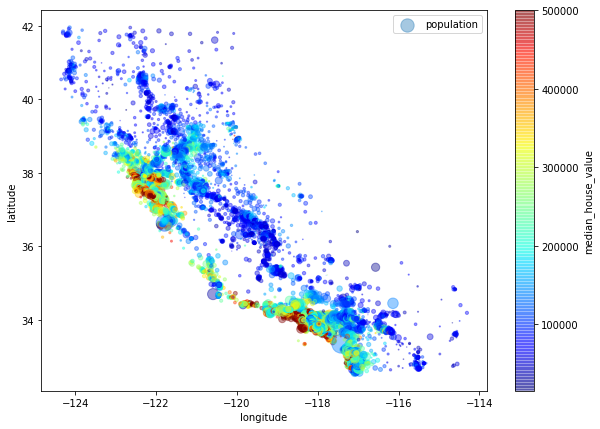

In [ ]:
#Data Visualisation(1)
#the median house value's scatter plot correlated with the longtitude and latitude
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0b1869c10>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

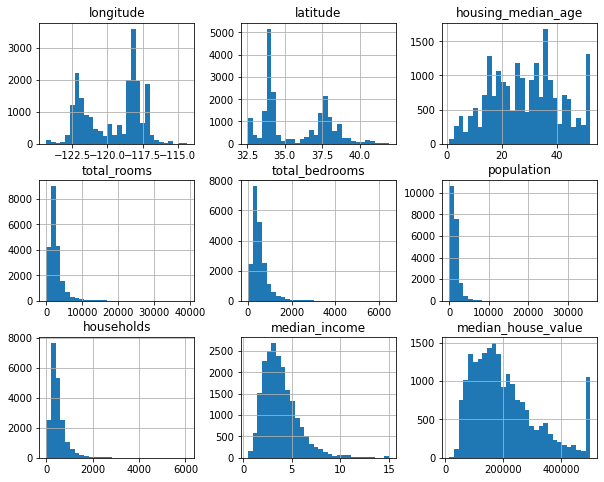

In [ ]:
#Data Visualization(2)
#histogram to show the distrbution of different factors
plt.figure()
data.hist(bins=30,figsize=(10,8))

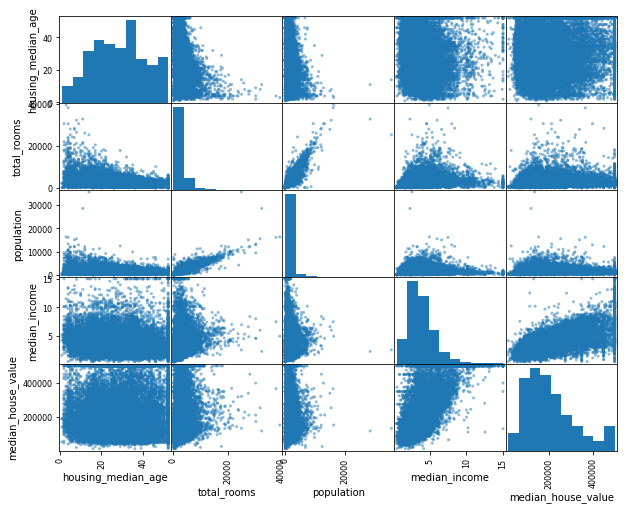

In [ ]:
#establish the correlation matrix
corr_matrix = data.corr()
scatter_matrix = scatter_matrix(data[['housing_median_age','total_rooms','population','median_income','median_house_value']], figsize=(10,8))

In [ ]:
# Clean the data
data_cleaned = data.drop("ocean_proximity", axis = 1)
num_attr = list(data_cleaned)
cat_attr = ["ocean_proximity"]

num_pipeline= Pipeline([
                        ("imputer",SimpleImputer(strategy="median")),
                        ("std_scaler", StandardScaler())
])

full_pipeline= ColumnTransformer([
                         ("num", num_pipeline, num_attr),
                         ("cat", OneHotEncoder(), cat_attr)
])
data_prepared = full_pipeline.fit_transform(data)
data.shape
data_prepared.shape

(20640, 14)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [ ]:
# Function: K Means
# -------------
# citation: https://flothesof.github.io/k-means-numpy.html
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
np.random.seed(42)


def distance(x,y,metrics):
  #dist = np.array()
  if metrics == "Sup":
    dist = np.abs(x-y[:, np.newaxis]).max(axis=2)
  elif metrics == "Manhattan":
    p = 1
    dist = ((np.abs(x-y[:, np.newaxis])**p).sum(axis=2))**1/p
  else:
  #elif metrics == "Euclidean":
    p = 2
    dist = ((np.abs(x-y[:, np.newaxis])**p).sum(axis=2))**(1/p)
  return np.argmin(dist, axis=0)


def move_centroids(points, closest, centroids):
  return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])


def K_Means(k, data, distance_metrics):
  random_centroid = data[np.random.choice(data.shape[0],k,replace = False)]
  dis_min = distance(data, random_centroid, distance_metrics)

# set the conditions
  fi_centroids = None
  i_it = 0

  while True:
    n_centroids = move_centroids(data, dis_min, random_centroid)
    fi_centroids = distance(data, n_centroids, distance_metrics)
    if (dis_min == fi_centroids).all():
      break
    dis_min = fi_centroids
  return n_centroids

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


Cluster Mean:  1
[-1.02426465  1.05375407  0.03687228 -0.11638681 -0.14994522 -0.19030376
 -0.15154008 -0.07014702 -0.13137156  0.17397644  0.47492989  0.
  0.25496354  0.09613012]
Standard Deviation:  1
[0.50233945 0.48634224 1.04612192 0.69386253 0.7076168  0.68813205
 0.73371939 0.97545733 1.02111354 0.37908923 0.49937109 0.
 0.43584072 0.2947696 ]
Cluster Mean:  2
[ 7.78790561e-01 -8.01212581e-01 -2.80355103e-02  8.84936813e-02
  1.14009524e-01  1.44695782e-01  1.15222155e-01  5.33356688e-02
  9.98872000e-02  6.46908316e-01  1.97611940e-01  4.26439232e-04
  1.44989339e-03  1.53603412e-01]
Standard Deviation:  2
[0.40530302 0.30704394 0.96251029 1.17309331 1.16169213 1.16268097
 1.14903396 1.0150259  0.97183037 0.4779309  0.39819777 0.020646
 0.03804985 0.36056817]
Cluster SSE:  2
162062.26244539523


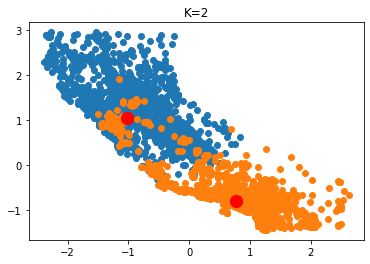

In [ ]:
centroids = K_Means(2, data_prepared, "Euclidean")
centroids_cl = distance(data_prepared, centroids, 2)
sse = 0
for i in range(0,2):
   cluster = data_prepared[centroids_cl == i]
   for t in cluster:
     sse += pow(np.sum(np.abs(t-centroids[i])**2)**(1/2),2)
   print("Cluster Mean: ", i+1)
   print(cluster.mean(axis=0))
   print("Standard Deviation: ", i+1)
   print(cluster.std(axis=0))
   plt.title("K=" + str(i+1))
   plt.scatter(cluster[:,0],cluster[:,1])
   plt.scatter(centroids[:,0],centroids[:,1], c = 'r', s=150)

print("Cluster SSE: ", 2)
print(sse)



Cluster Number:  2
Cluster Mean:  2
[ 0.18484489 -0.17499203 -0.87624937  1.93148165  2.00590601  1.85671591
  2.00840199  0.16082392  0.14092423  0.47666667  0.32625     0.
  0.08208333  0.115     ]
Standard Deviation:  2
[0.9825043  0.92329316 0.73639264 1.6589343  1.51302693 1.64303204
 1.48766968 0.94275721 0.93353174 0.49945526 0.46883999 0.
 0.27449164 0.31902194]


Cluster Number:  3
Cluster Mean:  2
[ 7.78790561e-01 -8.01212581e-01 -2.80355103e-02  8.84936813e-02
  1.14009524e-01  1.44695782e-01  1.15222155e-01  5.33356688e-02
  9.98872000e-02  6.46908316e-01  1.97611940e-01  4.26439232e-04
  1.44989339e-03  1.53603412e-01]
Standard Deviation:  2
[0.40530302 0.30704394 0.96251029 1.17309331 1.16169213 1.16268097
 1.14903396 1.0150259  0.97183037 0.4779309  0.39819777 0.020646
 0.03804985 0.36056817]


Cluster Number:  4
Cluster Mean:  3
[ 0.20061951 -0.17787196 -0.95004183  2.36190463  2.42245863  2.24029225
  2.42177453  0.19194841  0.14321482  0.46493813  0.35120801  0.
  0

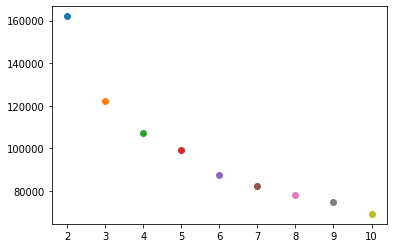

In [ ]:
# Your code goes here

for k in range(2,11):
  sse = 0
  print("\n")
  print("Cluster Number: ", k)
  print("Cluster Mean: ", i+1)
  print(cluster.mean(axis=0))
  print("Standard Deviation: ", i+1)
  print(cluster.std(axis=0))
  centroids = K_Means(k, data_prepared, "Euclidean")
  centroids_cl = distance(data_prepared, centroids, 2)
  for i in range(0,k):
    cluster = data_prepared[centroids_cl == i]
    for t in cluster:
      sse += pow(np.sum(np.abs(t-centroids[i])**2)**(1/2),2)
  plt.scatter(k, sse)


the elbow is around 7 here.

Cluster Mean:  1
[-0.65517236  1.07968182 -0.17500665 -0.52015315 -0.53025721 -0.53778619
 -0.57386736 -0.63983704 -0.93479258  0.03719008  0.91528926  0.
  0.02995868  0.01756198]
Standard Deviation:  1
[0.57882204 0.64634919 0.81341822 0.30751876 0.33460359 0.37134985
 0.34034689 0.5355463  0.37199986 0.18922732 0.27845077 0.
 0.17047333 0.13135281]
Cluster Mean:  2
[-1.33285647  1.04427346  1.21149673 -0.38003474 -0.34386525 -0.40619674
 -0.33791234 -0.27429463  0.0808873   0.1518228   0.09275496  0.
  0.60175358  0.15366867]
Standard Deviation:  2
[0.24478168 0.31675904 0.59921762 0.36767317 0.44179788 0.41652053
 0.45206468 0.55559353 0.81106326 0.35884904 0.29008874 0.
 0.48953673 0.36063085]
Cluster Mean:  3
[ 0.30498097 -0.24884402 -1.39232287  6.08390092  5.77998255  5.64399189
  5.79465314  0.42248111  0.16429468  0.44162437  0.39086294  0.
  0.07106599  0.0964467 ]
Standard Deviation:  3
[0.96292375 0.91420036 0.58582177 2.42576639 2.06026353 2.91298035
 2.02279355 0.8396552

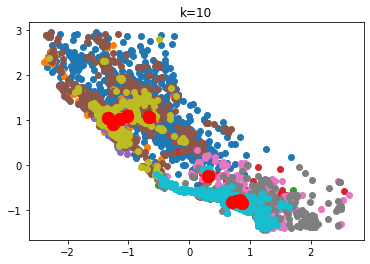

In [ ]:
#Sillicon Valley 10
centroids = K_Means(10, data_prepared, "Euclidean")
centroids_cl = distance(data_prepared, centroids, 2)
for i in range(0,10):
   cluster = data_prepared[centroids_cl == i]
   print("Cluster Mean: ", i+1)
   print(cluster.mean(axis=0))
   print("Standard Deviation: ", i+1)
   print(cluster.std(axis=0))

   plt.title("k="+str(i+1))
   plt.scatter(cluster[:,0],cluster[:,1])
   plt.scatter(centroids[:,0],centroids[:,1], c = 'r', s=150)

In [ ]:
# Your paragraph goes here for this section
# As k increases, there generally be appearing more clusters in the map. Meanwhile the standard deviation also decreases,
# And moreover, the mean generally decreases with the increments in k.
# it indeed correctly identified the silicon valley and the san francisco area as different clusters.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.



The preset number of clusters will largely affect the clustering results, because firstly, as the number of clusters increasing, the boundary between the house price of different places starts to become a little bit ambiguous, but more specific. For example, when there are only 2 clusters in the graph, it can be divided as the southern and northern california. When there are more clusters, there will form more centroids, the clusters will overlap more and it might be over fitting the whole region. Overlapping between different clusters will be quite confusing and made it more detailed.
I think my intuition on the California Housing Crisis would be that the housing are clustered in few central areas including Great LA area and San Francisco. Which means that those places might have really high housing price and the population at those places will be really high, therefore, people living in these places might have more burden to suffer from raising house price. And moreover, there will be less populations other areas. From my point of view, the solution to solve this problem might be developing more undeveloped places, such as northern California places, and western California places. And the population might migrate based on this, which will release some pressures in these areas.

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!